<a href="https://colab.research.google.com/github/adwge99/Convolutionnal-Neural-Network/blob/main/CNN_x_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN
Convolutionnal Neural Network




In [ ]:
#Importer les packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
#Chargement de BDD
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

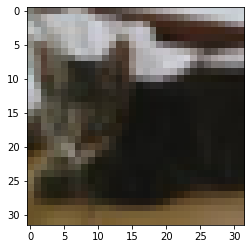

In [ ]:
#Visualiser les images
plt.imshow(x_train[9])
x_train[9]

In [ ]:
#Normaliser les photos par le maximum'255' pour avoir des numeros entre 0-1
x_train = x_train/255.0
x_test = x_test/255

In [ ]:
#Creer model de type sequentielle
model= Sequential()

In [ ]:
# Creer le CNN
#Convulution
model.add(Conv2D(256,(3,3), input_shape=x_train.shape[1:]))
#Fonction d'activation type relu
model.add(Activation('relu'))
#Fonction de pooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Convulution2
model.add(Conv2D(256,(3,3)))
#Fonction d'activation type relu
model.add(Activation('relu'))
#Fonction de pooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Flattening
model.add(Flatten())

In [ ]:
# Le Completement connecté
#couche de 64 noeuds
model.add(Dense(64))
#couche sortie de 10 noeuds (10 categories/types de photo)
model.add(Dense(10))
#Fonction d'activation type sigmoid
model.add(Activation('sigmoid'))
#Fonction de perte 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
#visualiser la synthese du reseaux
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 activation (Activation)     (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                    

In [ ]:
#Entrainer le model
model.fit(x_train,y_train, batch_size=32, epochs=20)

Epoch 1/20
  74/1563 [>.............................] - ETA: 11:07 - loss: 2.0638 - sparse_categorical_accuracy: 0.2458

KeyboardInterrupt: ignored

In [ ]:
tets_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 38s 122ms/step - loss: 0.9969 - sparse_categorical_accuracy: 0.6584
